<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 05: GeoVisualization </h3>

# Plan for Lecture 

1. Announcements 
2. Geovisulization 
3. Geographical Analysis Workflow
4. Choropleth mapping 
5. Classification Types

# GeoVisualization 

* Process of interactively visualizing geographic information in any of the steps in spatial analyses, 
* Originated in cartography, geovis was pioneered under the ledership of Alan MacEachren (Penn State), who developed tools and methods for interactive exploratory data analysis. 
* A core argument for geovisualization is that visual thinking using maps is integral to the scientific process and hypothesis generation, and the role of maps grew beyond communicating the end results of an analysis or documentation process. 
* Geovis interacts with cartography, visual analytics, information visualization, scientific visualization, statistics, computer science, art-and-design, and cognitive science. 

*Source: https://gistbok.ucgis.org/bok-topics/geovisualization* 

|||
|---|---|
|<img src="https://gistbok.ucgis.org/sites/default/files/CV35-Fig1b_350.png">|<img src="https://gistbok.ucgis.org/sites/default/files/CV35-Fig1a-350v.png">|
|Cartography Cube|Swoopy Framework|

# What does geoviz look like in practice? 

<img src="https://gistbok.ucgis.org/sites/default/files/CV35-Fig3_0.png">

# Skills for GeoVisualization 

* GUI-based tools and scripting languages (Processing, Python, D3JS)
* Data processing skills
* Analytical skills (statistics)
* Visualization skills

# Typical Geovisualization Workflow 

* Raw data contains more information than we can visualize effectively 
* Thus, good understanding of visulization techniques is required 
    * cluttered displays, overplotting
    * --> aggregate data, highlighting interesting aspects of data
    * if visualization is interative a **user** can explore the data and find **interesting** 
* visual displays 
* visual variables (Bertin) 
* UI and UX design 

# Typical Data Analysis (Lab) Workflow 

* **Find the data (Cal Fire)**
* **Pre-process the data: import, inspect visually, look at missing values, filter, drop.**
* **Exploratory Data Analysis (GEOVIZ). Generate visual and pose interesting questions about data (descriptive statistics)**
* Data Analysis (inferential statistics) 
* Present Findings

# Data Analysis Example - California Wildfires 

1. Finding data 
    1. Calfire publishes data in .gdb format, which is not straight-forward to analyze in Python (What software can we use to analyze it?) 
    2. Use terminal command 'wget' to download the data via URL from the internet 
    3. Find and download mannually ([try it now](https://gis.data.ca.gov/maps/CALFIRE-Forestry::california-fire-perimeters-all-1))
    4. Host on web services that provide readable url links and read via Pandas 'read_csv' function

# Brainstorm Exercise

> Working with your table, illicit interesting questions about wildfires in CA

> Think about variables that are already in the data set 
 
> What new variables can we generate that will help us answer the questions 

In [1]:
# copied form the lab 

# Data Analysis Example - California Wildfires 

2. Pre-process the data 
    1. remove variables that you will not be using (if necessary) 
    2. subset the data to your study area 
    3. convert variables for calculation (float --> int; string --> datetime; etc.) 

# Note on naming conventions in Python

* Never use the characters ‘l’ (lowercase letter el), ‘O’ (uppercase letter oh), or ‘I’ (uppercase letter eye) as single character variable names. In some fonts, these characters are indistinguishable from the numerals one and zero. When tempted to use ‘l’, use ‘L’ instead.
* Class names should normally use the CapWords convention. But we do not use classes in this class! 
* Function names should be lowercase, with words separated by underscores as necessary to improve readability. Variable names follow the same convention as function names.

More info in official [Python docs](https://peps.python.org/pep-0008/#prescriptive-naming-conventions) 

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fires = gpd.read_file('https://github.com/barguzin/geo_data/raw/main/fires.zip')
print(fires.shape) 
print(type(fires))

(5250, 8)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [4]:
fires.head()

,YEAR_,INC_NUM,UNIT_ID,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,geometry
0,2020,00013212,NEU,2020-06-18,2020-06-23,11.0,109.602280,"POLYGON ((-116841.251 97942.565, -116286.032 9..."
1,2020,00011799,NEU,2020-06-01,2020-06-04,2.0,685.585022,"POLYGON ((-117328.400 90212.407, -117226.732 8..."
2,2020,00007619,NEU,2020-03-31,2020-04-01,9.0,12.931545,"POLYGON ((-110213.270 105975.579, -110066.641 ..."
3,2020,00008471,NEU,2020-04-14,2020-04-19,18.0,10.315964,"POLYGON ((-111793.600 164243.615, -111624.716 ..."
4,2020,00015865,BEA,2020-07-15,2020-07-16,14.0,376.910400,"POLYGON ((-118955.900 122883.508, -118926.056 ..."


In [5]:
# convert data types 
fires['ALARM_DATE'] = pd.to_datetime(fires.ALARM_DATE)
fires['CONT_DATE'] = pd.to_datetime(fires.CONT_DATE)

# calculate duration
fires['dur_days'] = (fires.CONT_DATE - fires.ALARM_DATE).dt.days

In [6]:
# drop super long fires 

fires = fires.loc[fires.dur_days<365]

<AxesSubplot: xlabel='YEAR_'>

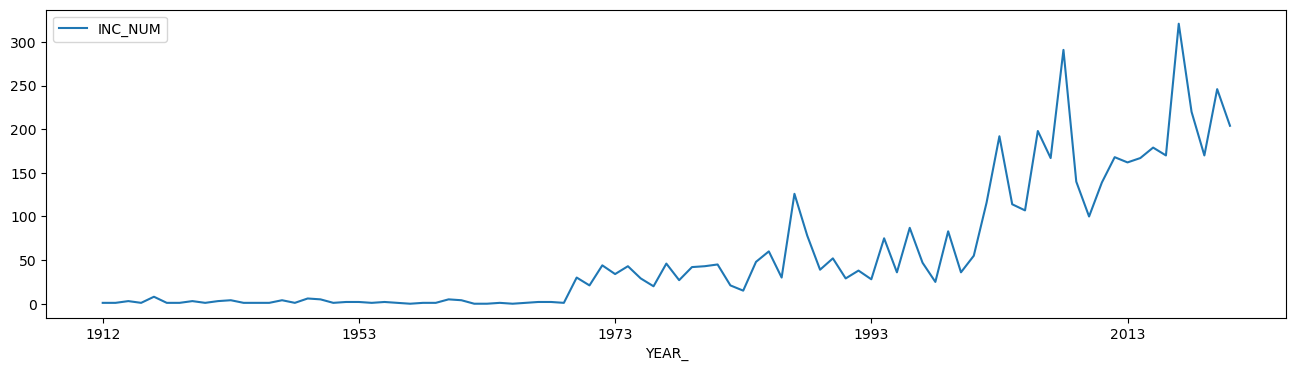

In [7]:
fires_per_year = fires.groupby("YEAR_")["INC_NUM"].count().reset_index()
fires_per_year.set_index('YEAR_', inplace=True)
fires_per_year.plot(figsize=(16,4))

In [8]:
# subset the data to only include one year 
fires2021 = fires.loc[fires['YEAR_']=='2021']
print(fires2021.shape) 

# drop a variable 
fires2021.drop('UNIT_ID', inplace=True, axis=1) 

# convert data types 
fires2021['ALARM_DATE'] = pd.to_datetime(fires2021.ALARM_DATE)
fires2021['CONT_DATE'] = pd.to_datetime(fires2021.CONT_DATE)

# calculate duration
fires2021['dur_days'] = (fires2021.CONT_DATE - fires2021.ALARM_DATE).dt.days

# get the month start of fires 
fires2021['month_started'] = fires2021.ALARM_DATE.dt.month

(205, 9)


C:\Users\barguzin\AppData\Local\Temp\ipykernel_12528\270685699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires2021.drop('UNIT_ID', inplace=True, axis=1)
C:\Users\barguzin\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\barguzin\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [9]:
# EXERCISE

fires2021['dow'] = fires2021.ALARM_DATE.dt.dayofweek # 0-Monday, 6-Sunday
fires2021.head()

C:\Users\barguzin\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,YEAR_,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,geometry,dur_days,month_started,dow
5038,2021,00002246,2021-03-27,2021-03-29,18.0,873.391724,"POLYGON ((-134941.882 436471.047, -135837.750 ...",2,3,5
5039,2021,00000468,2021-01-19,2021-01-22,9.0,20.307356,"MULTIPOLYGON (((-189428.399 -101523.942, -1894...",3,1,1
5040,2021,00000489,2021-01-19,2021-01-22,11.0,33.259224,"MULTIPOLYGON (((-163472.149 -114234.730, -1633...",3,1,1
5041,2021,00000490,2021-01-19,2021-01-22,11.0,19.725822,"POLYGON ((-189028.449 -89148.863, -189013.258 ...",3,1,1
5042,2021,00000508,2021-01-19,2021-01-21,9.0,21.936876,"MULTIPOLYGON (((-192632.039 -90258.236, -19255...",2,1,1


In [10]:
fires2021.dtypes

YEAR_                    object
INC_NUM                  object
ALARM_DATE       datetime64[ns]
CONT_DATE        datetime64[ns]
CAUSE                   float64
GIS_ACRES               float64
geometry               geometry
dur_days                  int64
month_started             int64
dow                       int64
dtype: object

# Exploratory Data Analysis

1. Think about how numbers (statistics), non-spatial plots and geographic maps can help answer the questions you posed in the previous exercise? 

> useful Python functions: groupby(), reset_index(), set_index(); mean(), median(), sum(); plot(); 

average duration of fires in 2021: 17.01951219512195


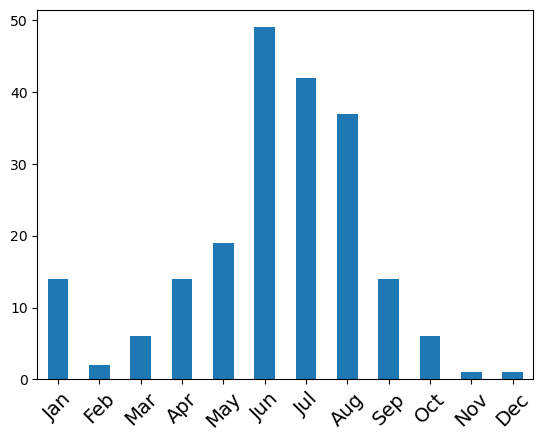

In [11]:
# find average dur of fires 
print('average duration of fires in 2021:', fires2021.dur_days.mean())

# add labels 
labs = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# get unique values and tally them 
# this works well for count() function 
# when you need to calculate total number of something
ax = fires2021.month_started.value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels(labs, rotation=45, fontsize=14);

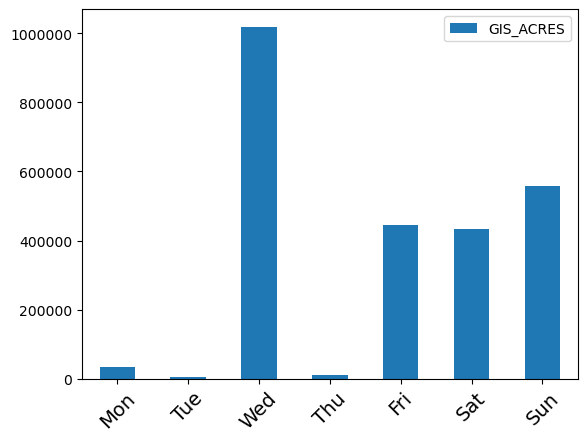

In [12]:
from matplotlib.ticker import FormatStrFormatter
# another way to aggregate data 
# when you need mean() or sum()
# total acreage by day of week for start of the fire 
fires_per_dow = fires2021.groupby('dow')['GIS_ACRES'].sum().reset_index()
fires_per_dow.set_index("dow", inplace=True)

# add labels 
labs = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = fires_per_dow.plot(kind='bar')
ax.set_xticklabels(labs, rotation=45, fontsize=14);
ax.set_xlabel(''); # remove 'dow' label 

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Add a spatial component to our analysis 

### Because this is an Intermediate Geographic Analysis Course 

#### 🙃

In [13]:
# read CA counties 
ca_counties = gpd.read_file('https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson')
ca_counties = ca_counties[['name', 'geometry']]
ca_counties.columns=['county_name', 'geometry']

# reproject 
ca_counties = ca_counties.to_crs(fires2021.crs)

print(ca_counties.shape)
print(ca_counties.crs, fires2021.crs)

ca_counties.head()

(58, 2)
epsg:3310 epsg:3310


,county_name,geometry
0,Alameda,"MULTIPOLYGON (((-203097.930 -10755.124, -20094..."
1,Alpine,"POLYGON ((-6288.628 76303.334, 3042.528 84440...."
2,Amador,"POLYGON ((-89497.637 53052.537, -89492.962 546..."
3,Butte,"POLYGON ((-161923.480 144686.420, -164426.638 ..."
4,Calaveras,"POLYGON ((-76796.914 1747.218, -80494.997 6443..."


# Spatial Join 101 

* A spatial join uses binary predicates (basic geometric operations) such as intersects and crosses to combine two GeoDataFrames based on the spatial relationship between their geometries. 
* A common use case might be a spatial join between a point layer and a polygon layer where you want to retain the point geometries (**target features**) and grab the attributes of the intersecting polygons (**join features**). 

<img src="https://web.natur.cuni.cz/~langhamr/lectures/vtfg1/mapinfo_1/about_gis/Image23.gif">

* A one-to-one operation will join a single feature from the join features into the target features. 
<img src="https://gisgeography.com/wp-content/uploads/2019/04/one-to-one-relationship-425x124.png">

* One-to-many operation will join all the features by creating multiple overlapping records. Each duplicate record contains the records from the joining features.
<img src="https://gisgeography.com/wp-content/uploads/2019/04/one-to-many-relationship-425x124.png">

In [14]:
print(fires2021.shape) 
fires2021_with_counties = gpd.sjoin(fires2021, ca_counties)
print(fires2021_with_counties.shape) 

(205, 10)
(226, 12)


# Disclaimer 

### When we do spatial join on the data with two polygon layers that are not aligned (i.e. we have fires geometries that are not contained within just one county), we will end up with duplicated records! 

### Thus, we will be overestimating totals and calculations will be imprecise! 

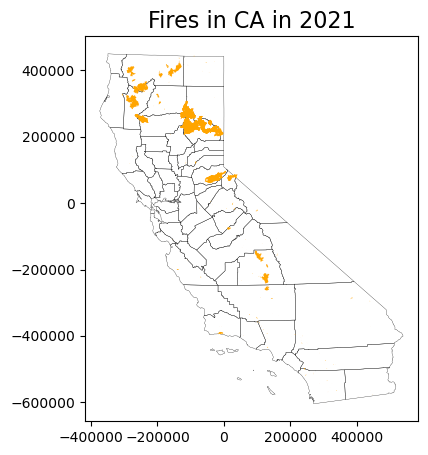

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

ca_counties.plot(ax=ax, fc='None', ec='k', lw=.2);
fires2021_with_counties.plot(ax=ax, fc='orange');
ax.set_title('Fires in CA in 2021', fontsize=16);

# Creating Choropleth Map with Aggregate Statistic 

1. Group data and calculate statistic 
2. Join aggregate to geometry 
3. Plot using GeoPandas 

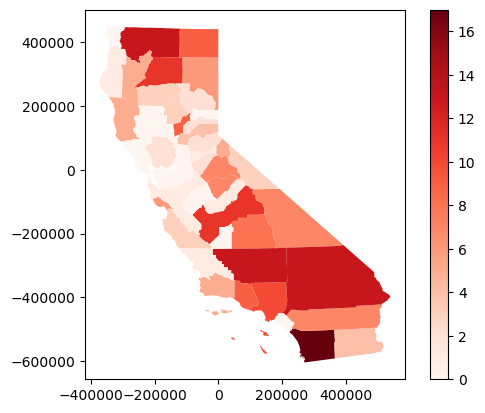

In [16]:
# calc total area of fires in CA counties in 2021 
# use 'dropna=False'  to keep all counties (even those that had zero fires)
tot_by_county21 = fires2021_with_counties.groupby('county_name', dropna=False)['INC_NUM'].count().reset_index()

# use non-spatial join to add geometries to the calculated dataframe 
# please note that we join to the left dataframe by default 
# thus if our left dataframe is geopandas the resulting dataframe 
# will also be geopandas
tot_by_county_geom21 = pd.merge(ca_counties, tot_by_county21, on='county_name', how='outer') 

# fill in missing with zeroes 
tot_by_county_geom21.fillna(0, inplace=True)

# count of fires is stored in column 'INC_NUM'
tot_by_county_geom21.plot(column='INC_NUM', legend=True, cmap='Reds');

In [17]:
# do the same for entire California 
print(fires.shape) 
fires_with_counties = gpd.sjoin(fires, ca_counties)
print(fires_with_counties.shape) 

(5243, 9)


(5598, 11)


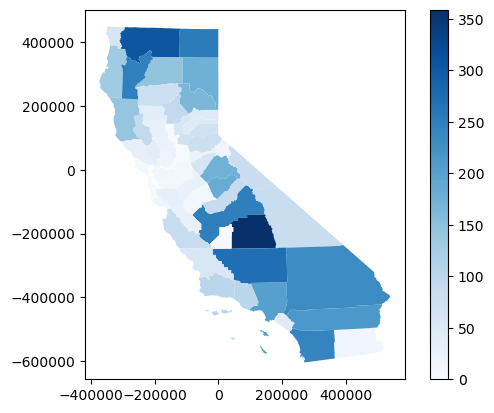

In [18]:
# calc total area of fires in CA counties in 2021 
# use 'dropna=False'  to keep all counties (even those that had zero fires)
tot_by_county = fires_with_counties.groupby('county_name', dropna=False)['INC_NUM'].count().reset_index()

# use non-spatial join to add geometries to the calculated dataframe 
# please note that we join to the left dataframe by default 
# thus if our left dataframe is geopandas the resulting dataframe 
# will also be geopandas
tot_by_county_geom = pd.merge(ca_counties, tot_by_county, on='county_name', how='outer') 

# fill in missing with zeroes 
tot_by_county_geom.fillna(0, inplace=True)

# count of fires is stored in column 'INC_NUM'
tot_by_county_geom.plot(column='INC_NUM', legend=True, cmap='Blues');

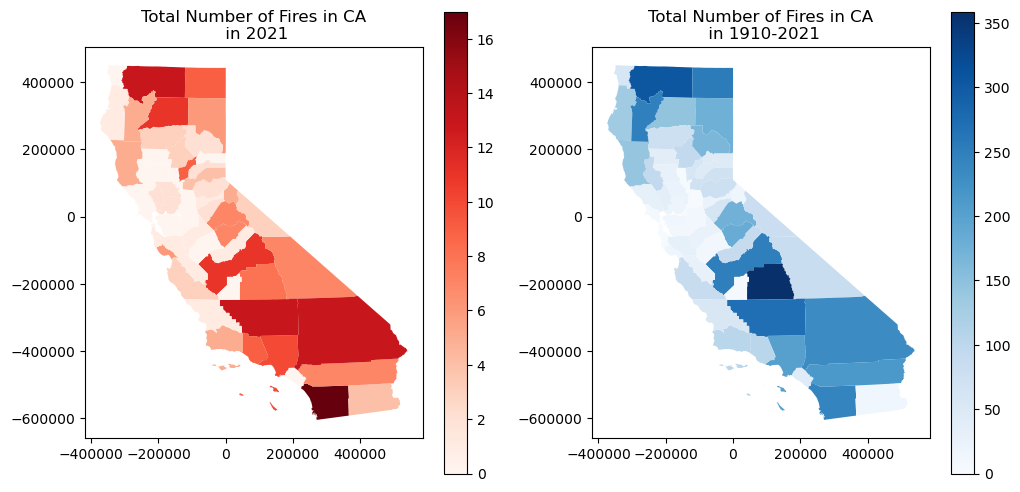

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

tot_by_county_geom21.plot(column='INC_NUM', legend=True, cmap='Reds', ax=ax[0]);
ax[0].set_title('Total Number of Fires in CA\n in 2021');
tot_by_county_geom.plot(column='INC_NUM', legend=True, cmap='Blues', ax=ax[1]);
ax[1].set_title('Total Number of Fires in CA\n in 1910-2021');

# Choropleth Maps 

* Geographic maps that display statistical information encoded in a color palette. 
* Display non-geographic attributes or variables on a geographic map. 
* The word choropleth stems from the root “choro”, meaning “region”. As such choropleth maps represent data at the regional level, and are appropriate for areal unit data where each observation combines a value of an attribute and a geometric figure, usually a polygon. 

# Drawing Choropleth Maps

1. Select a number of groups smaller than into which all values in our dataset will be mapped to; 
2. Identify a classification algorithm that executes mapping; 
3. Reduce all values in our data into corresponding number of groups, 
4. Assign color to each group. 

> In broad terms, the classification scheme defines the number of classes as well as the rules for assignment; while a good symbolization conveys information about the value differentiation across classes. Source: Geographic Data Science

# Quantitative Data Classification

> Partition the attribute values into mutually exclusive and exhaustive groups

$$
c_j < y_i \le  c_{j+1} \ \forall y_i \in C_{j}
$$

where $c_j$ and $c_{j+1}$ are lower and upper boundaryfor each of the $C_j$ groups and $y_i$ are observations.

# Quantitative Data Classifications

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa44acd9fd5f0dd50b07af2_histogram_examples.png">

In [20]:
import seaborn as sns 

# Plot histogram
ax = sns.histplot(fires["dur_days"], bins=5)
# Add rug on horizontal axis
sns.rugplot(fires["dur_days"], height=0.02, color="red", ax=ax);

AttributeError: module 'seaborn' has no attribute 'histplot'

In [21]:
fires.dur_days.describe()

count    5243.00000
mean       15.27427
std        29.13632
min         1.00000
25%         1.00000
50%         4.00000
75%        11.00000
max       222.00000
Name: dur_days, dtype: float64

In [22]:
counts, bins, patches = ax.hist(fires["dur_days"], bins=5)

# The counts object captures how many observations each category in the classification has
print('counts:', counts)

# The bin object stores these break points we are interested in when considering classification schemes 
# (the patches object can be ignored in this context, as it stores the geometries of the histogram plot)
print('bins:', bins)

counts: [4698.  293.  182.   60.   10.]
bins: [  1.   45.2  89.4 133.6 177.8 222. ]


# Equal Intervals

* For a given value of $k$, *equal intervals classification* splits the range of the attribute space into equal length intervals, with each interval having a width $w-\frac{x_0 - x_{n-1}}{k}$. 
* Equal intervals have the dual advantages of simplicity and ease of interpretation. 
* Because this rule only considers the extreme values of the distribution this can result in one or more classes being sparse. 

In [23]:
import mapclassify 

ei5 = mapclassify.EqualInterval(fires["dur_days"], k=5)
ei5

EqualInterval           

    Interval       Count
------------------------
[  1.00,  45.20] |  4698
( 45.20,  89.40] |   293
( 89.40, 133.60] |   182
(133.60, 177.80] |    60
(177.80, 222.00] |    10

# Qunatile 

* To avoid the potential problem of sparse classes, the quantiles of the distribution can be used to identify the class boundaries. 
* Each class will have approximately observations using the quantile classifier. 

## Problems: 

* The varying widths of the intervals can be markedly different which can lead to problems of interpretation. 
* There are a large number of duplicate values in the distribution such that the limits for one or more classes become ambiguous.

In [24]:
q5 = mapclassify.Quantiles(fires.dur_days, k=5)
q5

Quantiles               

    Interval       Count
------------------------
[  1.00,   1.00] |  1455
(  1.00,   2.00] |   669
(  2.00,   5.00] |  1081
(  5.00,  16.60] |   989
( 16.60, 222.00] |  1049

# Mean Standard Deviation

* Use sample mean and sample standard deviation to define class boundaries as some distance from the sample mean, with the distance being a multiple of the standard deviation (i.e. +/-1std, +/-2std, +/-3std) 
* This classifier is best used when data is normally distributed or, at least, when the sample mean is a meaningful measure to anchor the classification around. 

In [25]:
msd5 = mapclassify.StdMean(fires.dur_days)
msd5

StdMean                 

    Interval       Count
------------------------
(  -inf, -43.00] |     0
(-43.00, -13.86] |     0
(-13.86,  44.41] |  4690
( 44.41,  73.55] |   210
( 73.55, 222.00] |   343

# Maximum breaks 

* Considering the difference between sorted values. That is, rather than considering a value of the dataset in itself, it looks at how apart each value is from the next one in the sorted sequence. 
* The classifier then places the the break points in between the pairs of values most stretched apart from each other in the entire sequence, proceeding in descending order relative to the size of the breaks
* Maximum breaks is an appropriate approach when we are interested in making sure observations in each class are separated from those in neighboring classes. As such, it works well in cases where the distribution of values is not unimodal. 
* The algorithm is relatively fast to compute.

In [26]:
mb5 = mapclassify.MaximumBreaks(fires["dur_days"], k=5)
mb5

MaximumBreaks           

    Interval       Count
------------------------
[  1.00, 173.00] |  5233
(173.00, 186.50] |     4
(186.50, 199.50] |     4
(199.50, 212.00] |     1
(212.00, 222.00] |     1

# Fisher Jenks 

* Dynamic programming approach to minimize the sum of the absolute deviations around class medians
* Fisher-Jenks is guaranteed to produce an optimal classification for a prespecified number of classes

In [27]:
fj5 = mapclassify.FisherJenks(fires["dur_days"], k=5)
fj5

FisherJenks             

    Interval       Count
------------------------
[  1.00,  14.00] |  4109
( 14.00,  43.00] |   575
( 43.00,  80.00] |   249
( 80.00, 124.00] |   225
(124.00, 222.00] |    85

# More classifications 

* Box-Plot
* Head-Tail Breaks
* Jenks Caspall
* Max-P

In [28]:
fig, ax = plt.subplots(2,2, figsize=(16,8))

##################
# Equal Interval #
##################
tot_by_county_geom.plot(fc='None', ec='k', ax=ax[0,0])
tot_by_county_geom.plot(
     column="INC_NUM",  # Data to plot
     scheme="equal_interval",  # Classification scheme
    k=5,
     cmap="Reds",  # Color palette
     legend=True,  # Add legend
     legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
     ax=ax[0,0]
)
ax[0,0].set_axis_off();
ax[0,0].set_title('Equal Interval Classification', fontsize=12);

#############
# Quantiles #
#############
tot_by_county_geom.plot(fc='None', ec='k', ax=ax[0,1])
tot_by_county_geom.plot(
     column="INC_NUM",  # Data to plot
     scheme="quantiles",  # Classification scheme
    k=5,
     cmap="Reds",  # Color palette
     legend=True,  # Add legend
     legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
     ax=ax[0,1]
)
ax[0,1].set_axis_off();
ax[0,1].set_title('Quantiles Classification', fontsize=12);

##############
# Mean StDev #
##############
tot_by_county_geom.plot(fc='None', ec='k', ax=ax[1,0])
tot_by_county_geom.plot(
     column="INC_NUM",  # Data to plot
     scheme="StdMean",  # Classification scheme
     cmap="Reds",  # Color palette
     legend=True,  # Add legend
     legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
     ax=ax[1,0]
)
ax[1,0].set_axis_off();
ax[1,0].set_title('Mean StDev Classification', fontsize=12);

##########
# FISHER #
##########
tot_by_county_geom.plot(fc='None', ec='k', ax=ax[1,1])
tot_by_county_geom.plot(
     column="INC_NUM",  # Data to plot
     scheme="FisherJenks",  # Classification scheme
     cmap="Reds",  # Color palette
     legend=True,  # Add legend
     legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
     ax=ax[1,1]
)
ax[1,1].set_axis_off();
ax[1,1].set_title('Fisher Jenks Classification', fontsize=12);

fig.tight_layout()
fig.savefig('classif_compare.png')
plt.close(fig)

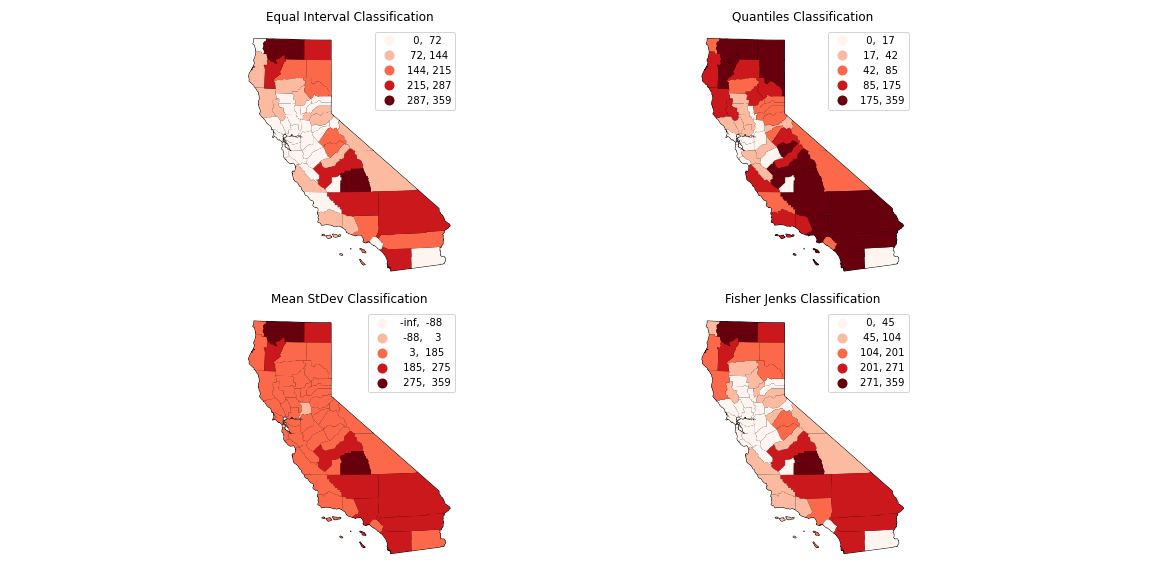

In [29]:
from IPython.display import Image
Image(filename='classif_compare.png') 

# Color in Choropleth Mapping 

* Classification scheme, symbolization and color scheme will determine the overall effectiveness of the choropleth map
* The choice of a color scheme for a choropleth map should be based on the type of variable under consideration
* Three types of numerical attributes: 
    * sequential - continuous data 
    * diverging - continuous data (equal weight on different parts of the spectrum) 
    * qualitative - categorical data 

<AxesSubplot:>

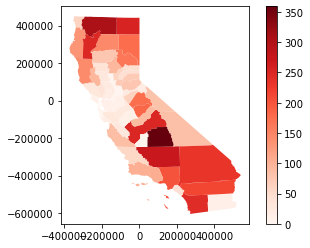

In [30]:
tot_by_county_geom.plot(column='INC_NUM', cmap='Reds', legend=True)

<AxesSubplot:ylabel='Frequency'>

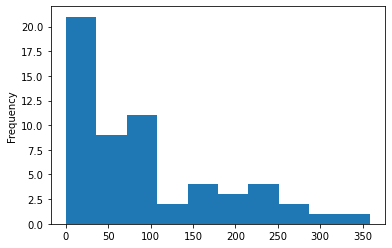

In [31]:
tot_by_county_geom.INC_NUM.plot(kind='hist')

<AxesSubplot:>

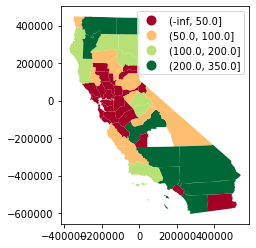

In [32]:
tot_by_county_geom["class_cnt"] = pd.cut(tot_by_county_geom["INC_NUM"], [-np.inf, 50, 100, 200, 350])

tot_by_county_geom.plot(column='class_cnt', cmap='RdYlGn', legend=True)

In [33]:
tot_by_county_geom['county_name'] = tot_by_county_geom.county_name.apply(lambda x: x.strip().lower().replace(' ', ''))
tot_by_county_geom.head()

,county_name,geometry,INC_NUM,class_cnt
0,alameda,"MULTIPOLYGON (((-203097.930 -10755.124, -20094...",10.0,"(-inf, 50.0]"
1,alpine,"POLYGON ((-6288.628 76303.334, 3042.528 84440....",18.0,"(-inf, 50.0]"
2,amador,"POLYGON ((-89497.637 53052.537, -89492.962 546...",23.0,"(-inf, 50.0]"
3,butte,"POLYGON ((-161923.480 144686.420, -164426.638 ...",95.0,"(50.0, 100.0]"
4,calaveras,"POLYGON ((-76796.914 1747.218, -80494.997 6443...",62.0,"(50.0, 100.0]"


<AxesSubplot:>

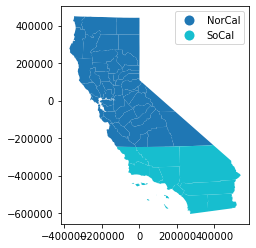

In [34]:
socal = ['Imperial', 'Kern', 'Los Angeles', 'Orange', 'Riverside','San Bernardino', 'San Diego', 'San Luis Obispo', 'Santa Barbara', 'Ventura']
socal = [x.strip().lower().replace(' ', '') for x in socal]

norcal = ['Alameda','Alpine','Amador','Butte','Calaveras','Colusa','Contra Costa','Del Norte','El Dorado','Fresno','Glenn','Humboldt', 'Inyo','Kings','Lake','Lassen','Madera','Marin','Mariposa','Mendocino','Merced','Modoc','Mono','Monterey','Napa','Nevada','Placer','Plumas','Sacramento','San Benito','San Francisco','San Joaquin','San Mateo','Santa Clara','Santa Cruz','Shasta','Sierra','Siskiyou','Solano','Sonoma','Stanislaus','Sutter','Tehama','Trinity','Tulare','Tuolumne','Yolo','Yuba']

norcal = [x.strip().lower().replace(' ', '') for x in norcal]

tot_by_county_geom['ca_region'] = pd.Series(dtype='str')
tot_by_county_geom.loc[tot_by_county_geom.county_name.isin(socal),'ca_region'] = "SoCal"
tot_by_county_geom.loc[tot_by_county_geom.county_name.isin(norcal),'ca_region'] = "NorCal"

tot_by_county_geom.plot('ca_region', categorical=True, legend=True)

# Questions? 

* Check out the [Choropleth Mapping Chapter in GDS book](https://geographicdata.science/book/notebooks/05_choropleth.html) and GIA Chapter 3 